# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('D:\MAE\Michigan Data Science Team\MDST-Onboarding-main\data\states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [65]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#rename columns

df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
#fill the missing values
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.count()

PRIMARY_KEY                     602
STATE                           602
YEAR                            602
ENROLL_ALL_EST                  528
TOTAL_REVENUE                   439
FEDERAL_REVENUE                 439
STATE_REVENUE                   439
LOCAL_REVENUE                   439
TOTAL_EXPENDITURE               439
INSTRUCTION_EXPENDITURE         439
SUPPORT_SERVICES_EXPENDITURE    439
OTHER_EXPENDITURE               397
CAPITAL_OUTLAY_EXPENDITURE      439
ENROLL_PREK                     518
ENROLL_KINDER                   528
ENROLL_4                        528
ENROLL_8                        528
ENROLL_12                       528
ENROLL_PRIMARY                  397
ENROLL_HS                       448
ENROLL_ALL                      528
AVG_MATH_4_SCORE                564
AVG_MATH_8_SCORE                602
AVG_READING_4_SCORE             521
AVG_READING_8_SCORE             478
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *GRADE 8 MATH*

How many years of data are logged in our dataset? 

In [73]:
df["YEAR"].max()-df["YEAR"].min()

np.int64(29)

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [68]:
michigan_scores = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].describe()
ohio_scores = df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].describe()
print("michigan")
print(michigan_scores)
print("ohio :")
print(ohio_scores)

michigan
count     12.000000
mean     276.166667
std        5.219428
min      264.000000
25%      276.750000
50%      277.500000
75%      280.000000
max      280.000000
Name: AVG_MATH_8_SCORE, dtype: float64
ohio :
count     12.000000
mean     282.250000
std        8.091803
min      264.000000
25%      281.750000
50%      285.000000
75%      286.500000
max      290.000000
Name: AVG_MATH_8_SCORE, dtype: float64


Find the average for your chosen test across all states in 2019

In [82]:
df_2019 = df[df["YEAR"] == '2019']
avg_scores_2019_by_state = df_2019.groupby('STATE')['AVG_MATH_8_SCORE'].describe()
print(avg_scores_2019_by_state)

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


For each state, find a maximum value for your chosen test score

In [88]:
state_group=df.groupby('STATE')
state_group['AVG_MATH_8_SCORE'].max()



STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [99]:
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['SUPPORT_SERVICE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: **<1st predictor = INSTRUCTION EXPENDITURE can be described as the amount of money spend on the interactions between teacher and student. Raising the money spend on instructions per student could affect the performance of the student on math test\

2nd predictor = support service expenditure is the increase of money spent on support services. the better the support available for student might have effect on the math score>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

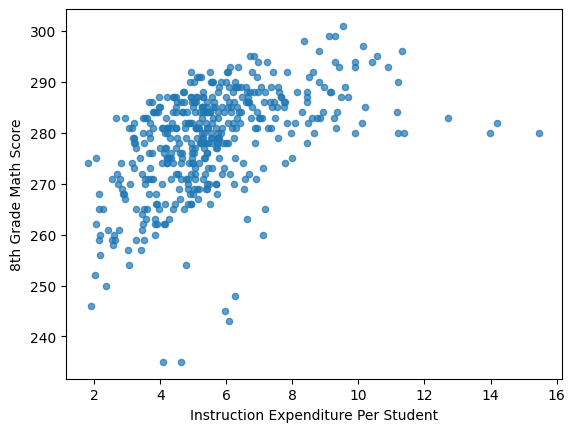

In [98]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE', alpha=0.7)
plt.xlabel('Instruction Expenditure Per Student')
plt.ylabel('8th Grade Math Score')

**<In this visualization we can see that the increase in instruction expenditure per student affect the 8th grade math score, altough the effect slow down on some level of expenditure>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

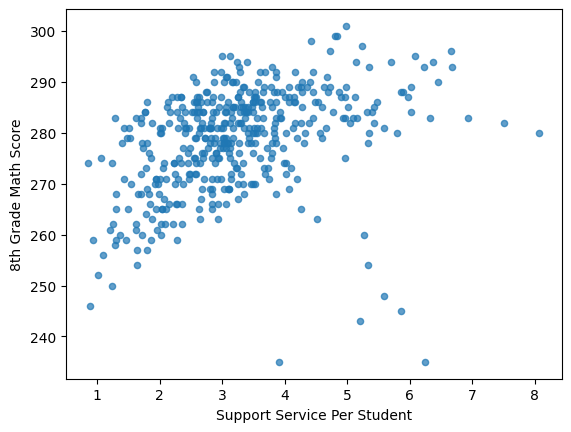

In [100]:
df.plot.scatter(x='SUPPORT_SERVICE_PER_STUDENT',y='AVG_MATH_8_SCORE', alpha=0.7)
plt.xlabel('Support Service Per Student')
plt.ylabel('8th Grade Math Score')

**<Increase in the support service expenditure per student has good correlation with the increase of 8th grade math, although it does not best described the increase of math grade and has to be compared to other predictors>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [101]:
from sklearn.model_selection import train_test_split

In [121]:
X =df[['INSTRUCTION_EXPENDITURE_PER_STUDENT','SUPPORT_SERVICE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [122]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [106]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [108]:
# create your model here
model = LinearRegression()

In [123]:
model.fit(X_train, y_train)

LinearRegression()

In [124]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [125]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)

np.mean(np.abs(model.predict(X_test)-y_test))

#since the intercept is already high and the coefficient of 2ND predictor is a minus, it is unfortunately not a good model to come up with. regardless, lets proceed to next step

267.51766612860376
[ 3.31135279 -2.19386496]


np.float64(7.119042447079008)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

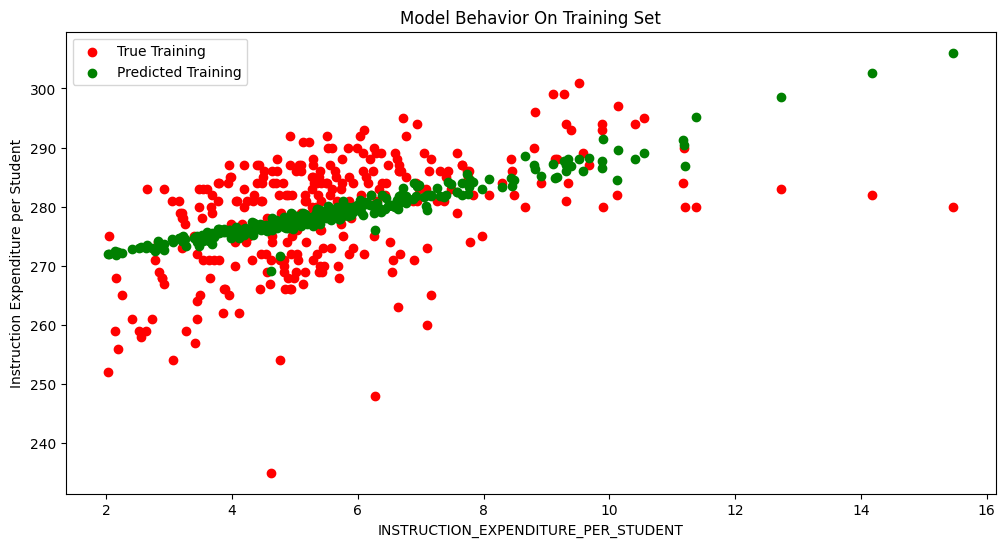

In [127]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Instruction Expenditure per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

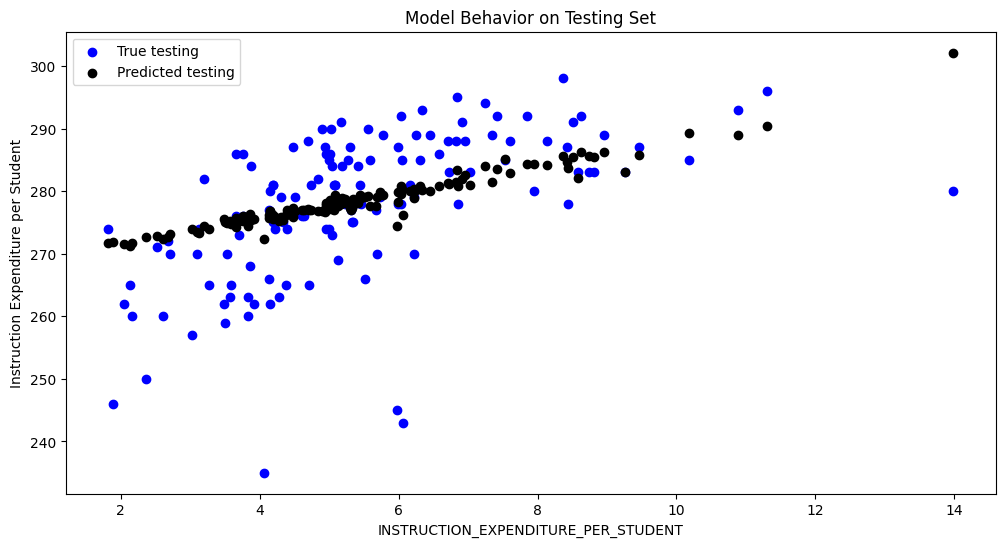

In [129]:
 col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_test[col_name], y_test, color = "blue")
 plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

 plt.legend(['True testing','Predicted testing'])
 plt.xlabel(col_name)
 plt.ylabel('Instruction Expenditure per Student')
 plt.title("Model Behavior on Testing Set")